In [40]:
%pylab inline
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


# Modelo de propagación de una enfermedad.

El siguiente modelo pretende dar una descripción de la propagación de una enfermedad analizando diferentes situaciones con el objetivo de identificar las mejores opciones a la hora de enfrentarse a una situación real de epidemia; es importante recordar que este modelo es una idealización,un tratamiento matemético de la situación, no obstante cuenta con relaciones encontradas en el comportamiento de enfermedades reales. 

Lo primero es definir quienes intervienen en el modelo, estos agentes son:

* Susceptibles (S)[personas no enfermas].
* Contagiados (I).
* Muertos (D).

A continuación se presentan tres situaciones importantes.

### Modelo simple(S).

Como primer acercamiento, se plantea un modelo en el cual la enfermedad no tiene cura y no hay natalidad. $\beta SI$ representa el número de personas sanas que se contagia por unidad de tiempo, $\delta S$ y $\delta I$ es el número de fallecidos por causas naturales y por la enfermedad por unidad de tiempo respectivemente.

$S'=-\beta SI -\delta S$

$I'=\beta SI-\delta I$

$D'=\delta S+\delta I$

Definiendo valores para los parámetros:

In [58]:
β=0.09
c=0.1
δ=0.001
η=0.006

Dando condiciones iniciales y el intervalo de tiempo que se quiere observar.

In [59]:
y0=(100000,0,0)

In [60]:
t=np.linspace(0,100)

In [64]:
def dU1_dt(y,t,β,c,δ,η):
    S,I,D=y
    return [-β*S*I-δ*S,β*S*I-δ*I,δ*S+δ*I]

In [65]:
U1=integrate.odeint(dU1_dt,y0,t,args=(β,c,δ,η))

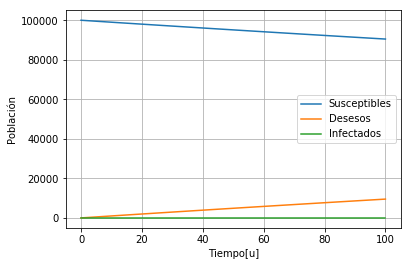

In [104]:
plt.plot(t,U1[:,0],label='Susceptibles')
plt.plot(t,U1[:,2],label='Desesos')
plt.plot(t,U1[:,1],label='Infectados')
plt.xlabel('Tiempo[u]')
plt.ylabel('Población')
plt.legend()
plt.grid()

### Modelo con cura(SC).

Suponemos que:
* los susceptibles pueden contagiarse por contacto con contagiados y muertos por la enfermedad(parámetro $\eta$).
* los contagiados tienen un cierto periodo de tiempo antes de morir.
* existe una cura que vuelve susceptibles a los contagiados.(parámetro $c$)
* no hay natalidad.

así el modelo dado por:

$S'=-\beta SI -\delta S+cI-\eta D$

$I'=\beta SI-\delta I+\eta D-cI$

$D'=\delta S+\delta I$

Para resolver el sistema de ecuaciones diferenciales

In [48]:
def dU_dt(y,t,β,c,δ,η):
    S,I,D=y
    return [-β*S*I-δ*S+c*I-η*D,β*S*I-δ*I+η*D-c*I,δ*S+δ*I]

In [51]:
U=integrate.odeint(dU_dt,y0,t,args=(β,c,δ,η))

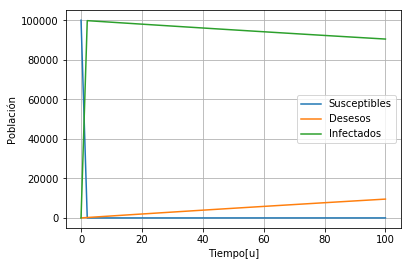

In [105]:
plt.plot(t,U[:,0],label='Susceptibles')
plt.plot(t,U[:,2],label='Desesos')
plt.plot(t,U[:,1],label='Infectados')
plt.xlabel('Tiempo[u]')
plt.ylabel('Población')
plt.legend()
plt.grid()

### Modelo con natalidad(SCN).

Complementando ahora con una tasa de natalidad constante, asumiendo esta como $l=1000$ personas por unidad de tiempo, cambiamos $S'$ por

$S'=l-\beta SI -\delta S+cI-\eta D$

In [81]:
l=1000

In [82]:
def dU2_dt(y,t,β,c,δ,η):
    S,I,D=y
    return [l-β*S*I-δ*S+c*I-η*D,β*S*I-δ*I+η*D-c*I,δ*S+δ*I]

In [83]:
U2=integrate.odeint(dU2_dt,y0,t,args=(β,c,δ,η))

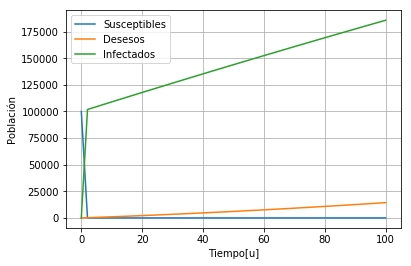

In [106]:
plt.plot(t,U2[:,0],label='Susceptibles')
plt.plot(t,U2[:,2],label='Desesos')
plt.plot(t,U2[:,1],label='Infectados')
plt.xlabel('Tiempo[u]')
plt.ylabel('Población')
plt.legend()
plt.grid()

Podemos notar que el hecho de que agregar natalidad al modelo provoca un crecimiento en la cantidad de infectados, en lugar de redurse luego de un pico en los otros modelos. Por tal razón sería interesante ver qué ocurre si se llevara a cbo un control sobre los infectados y los muertos.

### Modelo de control(SCN2).

Si hay un estricto control sobre los infectados($\beta \longrightarrow 0$) y los fallecidos(dado por $\lambda$) se tiene que:

$S'=l-\beta SI -\delta S+cI-\eta D$

$I'=\beta SI-\delta I+\eta D-cI$

$D'=\delta S+\delta I- \lambda D$

In [100]:
β2=0.00001
λ=0.9

In [87]:
def dU3_dt(y,t,β,c,δ,η,λ):
    S,I,D=y
    return [l-β*S*I-δ*S+c*I-η*D,β*S*I-δ*I+η*D-c*I,δ*S+δ*I-λ*D]

In [101]:
U3=integrate.odeint(dU3_dt,y0,t,args=(β2,c,δ,η,λ))

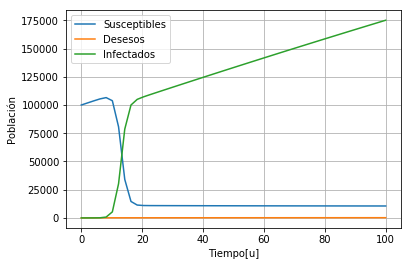

In [107]:
plt.plot(t,U3[:,0],label='Susceptibles')
plt.plot(t,U3[:,2],label='Desesos')
plt.plot(t,U3[:,1],label='Infectados')
plt.xlabel('Tiempo[u]')
plt.ylabel('Población')
plt.legend()
plt.grid()

### Conclusiones.

Como se vio en el primer modelo hay un aparente control de la enfermedad, debido tal vez a la simleza del mismo; por el contrario en los modelos $SC$ Y $SCN$ hay una rápida proliferación de la enfermedad a la vez que un rápido descenso de la población sana, a pesar de la natalidad en $SCN$. Puede comprobar que a medida que $\beta \longrightarrow 0$, la cantidad de personas no infectadas aumenta y se estabiliza, mientras se retrasa el crecimiento de personas infectadas; esto quiere decir que la mejor manera de enfrentar una enfermedad, más que una cura y una natalidad grande, requiere algo que haga inmunes a las personas, además de un control fuerte sobre los factores de contagio.